# Intuition

Entropy appears in 2 areas:

## Entropy in Decision Trees

Please read [entropy-how-decision-trees-make-decisions](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8) first.

If you are like me, who touched on Entropy as a loss function, then it is slightly confusing for the entropy here.

Entropy is a measure of disorder and chaos.

# Notations and Definitions

$$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

Intuitively, if we are predicting an image of a cat vs dog, and we pass in a query image $x_{q}$ of pixels, we expect the $y_{q}$ to take on class 0 or 1. However, taking a step back, in ML setting, we often have a calibrated probability $y_{q}$ before the classifier tells us whether it is a 0 or 1 based on a decision (say if probability more than 0.5, then its 1, and 0 otherwwise). This probability is a soft label and in our scenario, should output an array 

```python
y_q = [probability of x_q being a cat 0, probability of x_q being a dog 1] = [0.5, 0.5]
```

In this case, we can say that our prediction $Y$ is a DISCRETE random variable with probability distribution $p$, and thus the entropy of $Y$ can be formally defined as:

$$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

where we are summing over all values that $Y$ took on.

In this case, it is 

```python
entropy of y_q = -( 0.5 * lg 0.5 + 0.5 * lg 0.5 ) = -(-0.5 + -0.5) = 1
```

Note we are using lg base 2 here and so our maximum entropy is 1.

- Entropy is maximum if each random variable is equi-probable.
- Entropy Loss is usually used as a loss function in ML as it penalizes "wrong predictions" and favours confident predictions.

In the image below, let's say $y$ is a random variable taking on a uniform distribution, for example, if we are predicting a cat or dog image, where $y$ is the probability output from a classifier, taking on 0 to 1. If we were to assume $y \sim U[0,1]$, then it follows that $H(y) = 1$ as $y$ will always be of $[0.5, 0.5]$ in prediction.

Let us now see two different cases if $y$ follows a gaussian distribution, $y_{1} \sim \mathcal{N_1}[0,1]$ and $y_{2} \sim \mathcal{N_2}[0,1]$

Visually, we can see that the second gaussian has a higher peak than the first, hence we can deduce that $H(y_{2}) < H(y_{1})$ because since the higher peak suggest that the points of $y_{2}$ are tightly spread around each other, and since the points are close, there is less penalty in the $\log$. Even more geometrically, if we take "uniform distribution" as the one with highest entropy, we can say that as the gaussian curve smoothes out -> becoming more uniform, then the entropy rises.

![title](entropy_distribution.png)

In [43]:
import numpy as np
import scipy
from math import log2
import numpy as np
from typing import List
from math import log2
from typing import *
import numpy as np


def class_probabilities(labels: List[any]) -> List[float]:
    """Calculate frequency of each class.

    From DSFS book, it mentions that we do not actually care about which label is associated with which probability. Thus it is okay to use a dictionary which does not preserve order.

    Args:
        labels (List[any]): [description]

    Returns:
        label_probs (List[float]): [description]

    Example:
        labels = ['dog', 'dog', 'cat', 'cat', 'dog'] = [0, 0, 1, 1, 0]
        assert class_probabilities(labels) = [2/5, 3/5] or class_probabilities(labels) = [3/5, 2/5]
    """

    num_samples = len(labels)

    label_count: Dict = {}
    label_probs: List = []

    for label in labels:
        if label not in label_count:
            label_count[label] = 1
        else:
            label_count[label] += 1

    for label, count in label_count.items():

        label_probs.append(count / num_samples)

    return label_probs


def _entropy(
    class_probabilities: List[float], epsilon: float = 1e-15, log_base: int = 2
) -> float:
    """[summary]

    Args:
        class_probabilities (List[float]): Frequency probability of class occurences.

    Returns:
        entropy (float): [description]

    Example:
        # maximum chaos -> entropy = 1
        class_probabilities = [1/2, 1/2]
        assert _entropy(class_probabilities) == 1

        # minimum chaos -> entropy = 0
        class_probabilities = [1, 0] # or [0, 1]
        assert _entropy(class_probabilities) == 0

        class_probabilities = [2/5, 3/5]
        assert _entropy(class_probabilities) == 0.9709505944546686
    """

    assert np.sum(class_probabilities) == 1

    entropy = 0

    for _y in class_probabilities:
        if _y == 0:
            _y = epsilon

        entropy += _y * log2(_y)

    entropy = -1 * entropy

    return entropy


def calculate_entropy(labels: List[any]) -> float:
    """[summary]

    Args:
        labels (List[any]): [description]

    Returns:
        float: [description]
    """

    return _entropy(class_probabilities(labels))



In [40]:
# maximum chaos -> entropy = 1
class_probabilities = [1/2, 1/2]
assert _entropy(class_probabilities) == 1

# minimum chaos -> entropy = 0 but due to we cannot take log0, we just assert it is infinitely close to 0
class_probabilities = [1, 0] # or [0, 1]
assert np.isclose(_entropy(class_probabilities), 0)

class_probabilities = [2/5, 3/5]
assert _entropy(class_probabilities) == 0.9709505944546686

In [45]:
print(scipy.stats.entropy([1/2, 1/2], base=2))
print(_entropy([1/2, 1/2]))
print(_entropy([2/5, 3/5]))
print(calculate_entropy([1, 1, 0, 0, 1]))

1.0
1.0
0.9709505944546686
0.9709505944546686


We see that the Entropy of each point in the plot below, and find that on the extreme, `[0, 1]` and `[1, 0]`, our entropy is the lowest with 0.

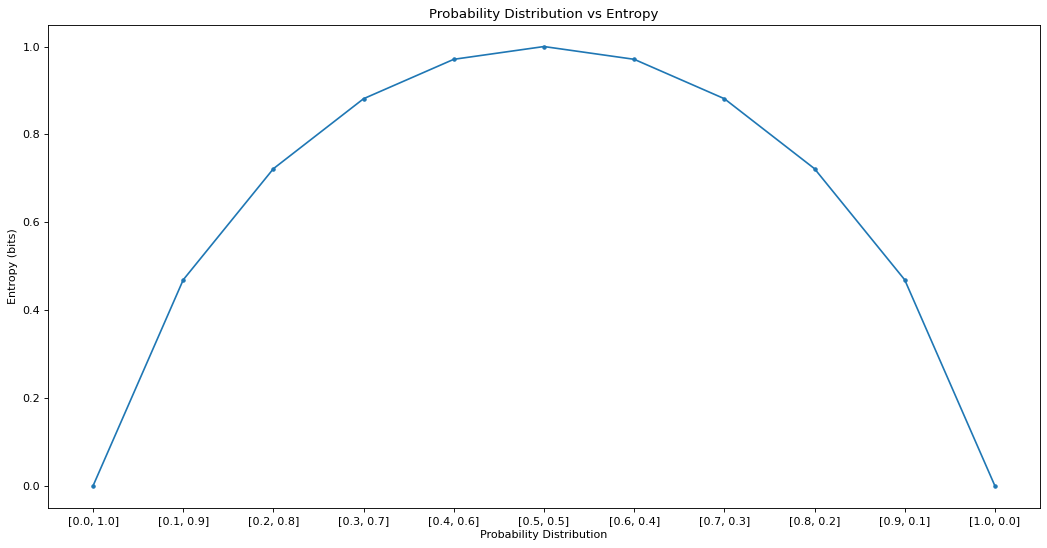

In [25]:
# Reference to machine learning mastery
# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
# calculate entropy
def entropy(events, ets=1e-15):
    return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
# create probability distribution
dists = [[round(p, 1) , round((1.0 - p), 1)] for p in probs]

# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()


## Entropy as a loss function

We need to make sense of entropy in the form of a loss function, we have to just enhance our thinking a little.

We define our target to be a one-hot encoded vector of class 0 and 1.

```python
target = [0, 1]
```


Intuitively, take the cat vs dog binary classification again, we made 11 predictions for ONLY ONE query image using different model, and find that the "softmax" prediction logits are as such:

```python
[
    [0.0, 1.0],
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.4, 0.6],
    [0.5, 0.5],
    [0.6, 0.4],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
    [1.0, 0.0],
]
```

where the first index corresponds to the logits of class 0 and second index corresponds to the logits of class 1. 


For example, `[1, 0]` means the model is 100 percent confident the prediction is a class 0 (cat), and obviously we need to punish the model for spitting nonsense like this.


As we can see in the `binary_cross_entropy` function below, we only need to add up two things. And note that we are hinging on class 1 and therefore `y_true[0] * log(y_pred[0]+eps)` goes to 0 as we are just relying on our feedback of probability of class 1.

And in our graph, we can see that as predictions gets more wrong, meaning to say, if the query image is a dog, but our predictions is `[1, 0]`, which says it is a cat, our entropy loss will blow up to very high because 

```python
y_true[1] * log(y_pred[1]+eps) -> 1 * log(1+eps) -> almost infinity
```

Note again we do not calculate for class 0 because 

1. We one-hot encoded.
2. We only look at class 1's probability and that's enough as we can deduce class 0's probability anyways.

And conversely, note how the entropy loss goes to 0 if our prediction is say `[0, 1]`. In general, as our probability for the query image gets close to 1, or in agreement with our class, then our entropy loss becomes smaller.




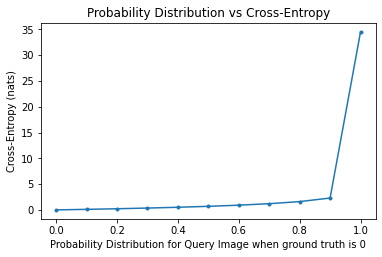

In [27]:
from math import log

# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
    return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])

def binary_cross_entropy(y_true, y_pred, eps=1e-15):
    return -(y_true[0] * log(y_pred[0]+eps) + y_true[1] * log(y_pred[1]+eps))

# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [
    [0.0, 1.0], # cat is 0% and dog is 100% confidence
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.4, 0.6],
    [0.5, 0.5],
    [0.6, 0.4],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
    [1.0, 0.0],
]

# create probability distributions for the two events
# dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [binary_cross_entropy(y_true=target, y_pred=d) for d in probs]
# plot probability distribution vs cross-entropy
pyplot.plot([p[1] for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
#pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution for Query Image when ground truth is 1')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

- [machinelearningmastery-information-entropy](https://machinelearningmastery.com/what-is-information-entropy/)
- [scipy-entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)
- [analytics-vidhya-entropy-loss](https://medium.com/analytics-vidhya/understanding-entropy-the-golden-measurement-of-machine-learning-4ea97c663dc3#:~:text=By%20using%20entropy%20in%20machine,be%20desired%20in%20model%2Dbuilding.)
- [cross-entropy-loss-machine-learning-mastery](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [entropy-how-decision-trees-make-decisions](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)